# Figure 3 Final

Notebook to make figure 3 for ms <br>
by Cascade Tuholske 2020.02.23

Updated 2020.04.08 by CPT to drop the scatter plots<br>
Ran 2020.09.08 by CPT for MS <br>

Updated Feb 2021 for PNASv2 CPT

In [2]:
#### Depdencies 
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from scipy.optimize import fmin
from scipy.stats import beta
from scipy.special import gamma as gammaf
import scipy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import operator

In [24]:
#### Load Data
# file path
DATA_IN = "/home/cascade/projects/UrbanHeat/data/processed/PNAS-DATA-v2/"  # Note: Need ?dl=1 to make sure this file gets read correctly
FIG_OUT = "/home/cascade/projects/UrbanHeat/figures/"

# Raw Heat
FN_IN = 'WBGT28_1D_TREND_EXP05.json'
HI_STATS = pd.read_json(DATA_IN+FN_IN, orient = 'split')
FN_OUT = 'Fig3-WBGT23.png'

In [25]:
#### Chunk Data for plots -- see functions for warnings explained 

# Chunk 1
geog1 = 'region'
loc1 = 'Europe'
chunk1 = HI_STATS[HI_STATS[geog1] == loc1]

# # Chunk 2
geog2 = 'sub-region'
loc2 = 'Latin America and the Caribbean'
chunk2 = HI_STATS[HI_STATS[geog2] == loc2]

# # Chunk 3
geog3 = 'sub-region'
loc3 = 'Southern Asia'
chunk3 = HI_STATS[HI_STATS[geog3] == loc3]


# Chunk 4
geog4 = 'sub-region'
loc4 = 'Sub-Saharan Africa'
chunk4 = HI_STATS[HI_STATS[geog4] == loc4]


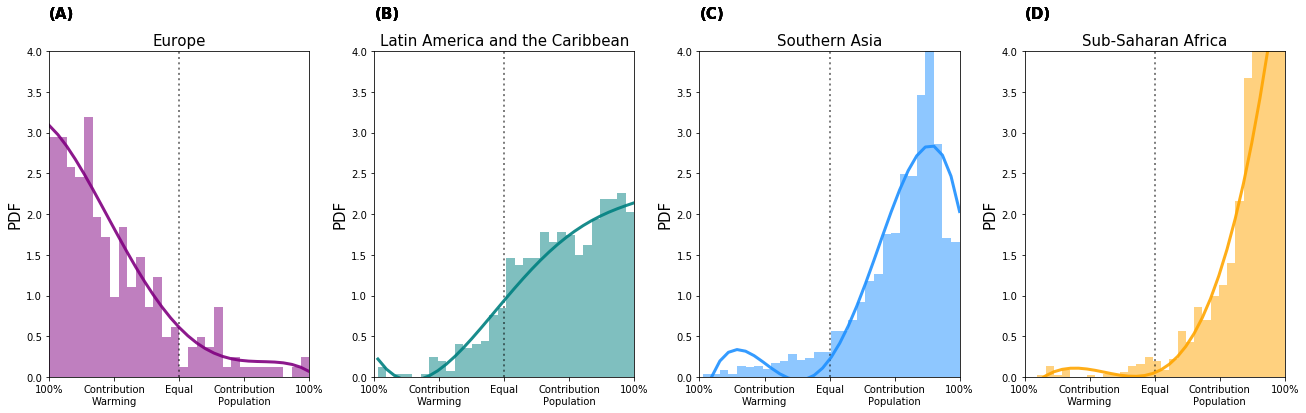

In [26]:
#### Fig 3 Plot - 4 Panel CPT 2020.04.08 / Feb 2021 WBGT28 day

# Chunks in a list & colors
df_list = [chunk1 , chunk2 , chunk3 , chunk4]
color_list = ['purple', 'teal', 'dodgerblue', 'orange']
loc_list = [loc1, loc2, loc3, loc4]

# Size
fig, axs = plt.subplots(1, 4, figsize = (24, 6), sharex=False, sharey = False)
axs = axs.ravel()
fig.subplots_adjust(wspace= 0.25, hspace = 0.35)
fig = plt.gcf()

# Plot args
kwargs = {'lw': 3, 'alpha' : 0.9, 'linestyle' : '-'} # ked line kwargs

for i, df in enumerate(zip(df_list, color_list)):
    
    xlim = [0,1]
    ylim = [0,4]
    ticks = [0, .25, .5, .75, 1]
    #labels = [str(100), 50, 0, 50, str(100)]#[100, 80, 60, 40, 20, 0, 20, 40, 60, 80, 100]
    labels = ['100%','Contribution\nWarming', 'Equal', 'Contribution\nPopulation', '100%']
    
    # Git data for hist and poly fit 
    data = df[0]['coef_attrib_norm'] 
    axs[i].hist(data, density = True, color = df[1], alpha = 0.50, bins = 30) 
    x = axs[i].hist(data, density = True, color = df[1], alpha = 0, bins = 30)[1]
    y = axs[i].hist(data, density = True, color = df[1], alpha = 0, bins = 30)[0]
    y = np.insert(y, 0, y[0])

    # Poly fit plot
    x = x[:, np.newaxis]
    y = y[:, np.newaxis]
    polynomial_features= PolynomialFeatures(degree=4)
    x_poly = polynomial_features.fit_transform(x)
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    axs[i].plot(x, y_poly_pred, alpha = 0.9, linewidth=3, color = color_list[i])

    # V line 
    axs[i].vlines(x = 0.5, ymin = 0, ymax = 5, lw=2, linestyles = ':', 
                  alpha = 0.5, color = 'black')

    #sns.kdeplot(data, color = df[1], ax = axs[i], **kwargs, legend = False) # kernel
    axs[i].set_title(loc_list[i], fontsize = 15) 
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_ylabel('PDF', fontsize = 15)
    #axs[i].set_xlabel('% Warming                 % Population', fontsize = 15)
    axs[i].set_xticks(ticks);
    axs[i].set_xticklabels(labels)
    
    # add panel labels
    axs[0].text(0.00, 1.1, '(A)', transform=axs[0].transAxes, size=15, fontweight='bold')
    axs[0].text(1.25, 1.1, '(B)', transform=axs[0].transAxes, size=15, fontweight='bold')
    axs[0].text(2.5, 1.1, '(C)', transform=axs[0].transAxes, size=15, fontweight='bold')
    axs[0].text(3.75, 1.1, '(D)', transform=axs[0].transAxes, size=15, fontweight='bold')
    
### color bar on far left plot
kwargs = {'anchor' : (-0.5, 0.5), 'fraction' : .01, 'shrink' : 2}
fig.subplots_adjust(right=0.84)

plt.savefig(FIG_OUT+FN_OUT, dpi = 300, bbox_inches='tight')

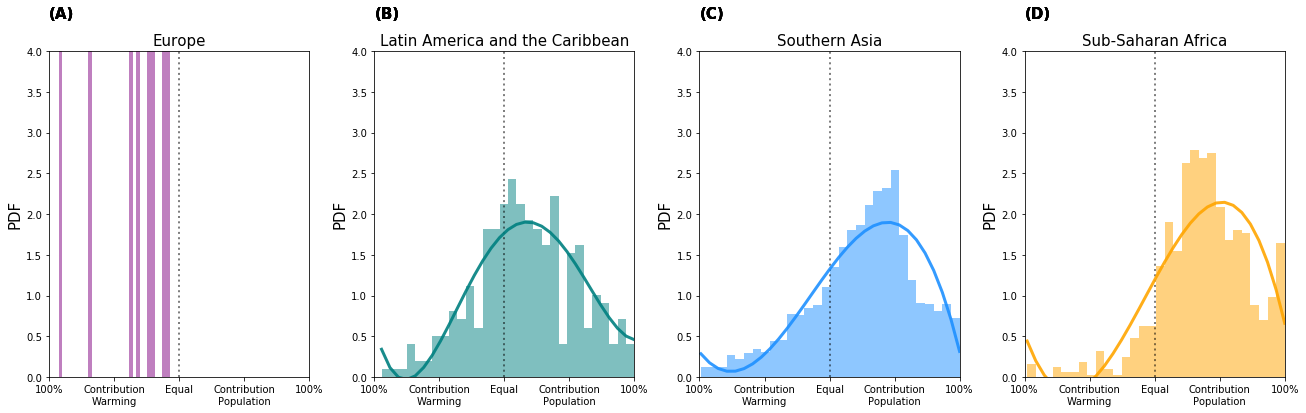

In [23]:
#### Fig 3 Plot - 4 Panel CPT 2020.04.08 CPT 2020.04.08 / Feb 2021 WBGT32 day

# Chunks in a list & colors
df_list = [chunk1 , chunk2 , chunk3 , chunk4]
color_list = ['purple', 'teal', 'dodgerblue', 'orange']
loc_list = [loc1, loc2, loc3, loc4]

# Size
fig, axs = plt.subplots(1, 4, figsize = (24, 6), sharex=False, sharey = False)
axs = axs.ravel()
fig.subplots_adjust(wspace= 0.25, hspace = 0.35)
fig = plt.gcf()

# Plot args
kwargs = {'lw': 3, 'alpha' : 0.9, 'linestyle' : '-'} # ked line kwargs

for i, df in enumerate(zip(df_list, color_list)):
    
    xlim = [0,1]
    ylim = [0,4]
    ticks = [0, .25, .5, .75, 1]
    #labels = [str(100), 50, 0, 50, str(100)]#[100, 80, 60, 40, 20, 0, 20, 40, 60, 80, 100]
    labels = ['100%','Contribution\nWarming', 'Equal', 'Contribution\nPopulation', '100%']
    
    # Git data for hist and poly fit 
    data = df[0]['coef_attrib_norm'] 
    
    if i == 0:
        
        axs[i].hist(data, density = True, color = df[1], alpha = 0.50, bins = 30) 
        
    else:
        axs[i].hist(data, density = True, color = df[1], alpha = 0.50, bins = 30) 
        x = axs[i].hist(data, density = True, color = df[1], alpha = 0, bins = 30)[1]
        y = axs[i].hist(data, density = True, color = df[1], alpha = 0, bins = 30)[0]
        y = np.insert(y, 0, y[0])

        # Poly fit plot
        x = x[:, np.newaxis]
        y = y[:, np.newaxis]
        polynomial_features= PolynomialFeatures(degree=4)
        x_poly = polynomial_features.fit_transform(x)
        model = LinearRegression()
        model.fit(x_poly, y)
        y_poly_pred = model.predict(x_poly)
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
        x, y_poly_pred = zip(*sorted_zip)
        axs[i].plot(x, y_poly_pred, alpha = 0.9, linewidth=3, color = color_list[i])

    # V line 
    axs[i].vlines(x = 0.5, ymin = 0, ymax = 5, lw=2, linestyles = ':', 
                  alpha = 0.5, color = 'black')

    #sns.kdeplot(data, color = df[1], ax = axs[i], **kwargs, legend = False) # kernel
    axs[i].set_title(loc_list[i], fontsize = 15) 
    axs[i].set_xlim(xlim)
    axs[i].set_ylim(ylim)
    axs[i].set_ylabel('PDF', fontsize = 15)
    #axs[i].set_xlabel('% Warming                 % Population', fontsize = 15)
    axs[i].set_xticks(ticks);
    axs[i].set_xticklabels(labels)
    
    # add panel labels
    axs[0].text(0.00, 1.1, '(A)', transform=axs[0].transAxes, size=15, fontweight='bold')
    axs[0].text(1.25, 1.1, '(B)', transform=axs[0].transAxes, size=15, fontweight='bold')
    axs[0].text(2.5, 1.1, '(C)', transform=axs[0].transAxes, size=15, fontweight='bold')
    axs[0].text(3.75, 1.1, '(D)', transform=axs[0].transAxes, size=15, fontweight='bold')
    
### color bar on far left plot
kwargs = {'anchor' : (-0.5, 0.5), 'fraction' : .01, 'shrink' : 2}
fig.subplots_adjust(right=0.84)

plt.savefig(FIG_OUT+FN_OUT, dpi = 300, bbox_inches='tight')

# More panels

In [ ]:
#### Fig 3 Plot

# Chunks in a list & colors
df_list = [plotdata1 , plotdata2 , plotdata3 , plotdata4, plotdata1 , plotdata2 , plotdata3 , plotdata4]
color_list = ['purple', 'teal', 'dodgerblue', 'orange', 'purple', 'teal', 'dodgerblue', 'orange']
loc_list = [loc1, loc2, loc3, loc4, loc1, loc2, loc3, loc4]

# Size
fig, axs = plt.subplots(2, 4, figsize = (24, 12), sharex=False, sharey = False)
axs = axs.ravel()
fig.subplots_adjust(wspace= 0.25, hspace = 0.35)
fig = plt.gcf()

# Plot args
kwargs = {'lw': 3, 'alpha' : 0.9, 'linestyle' : '-'} # ked line kwargs

for i, df in enumerate(zip(df_list, color_list)):
    
    # First row
    if i < 4:
        xlim = [0,1]
        ylim = [0,4]
        ticks = [0, .25, .5, .75, 1]
        #labels = [str(100), 50, 0, 50, str(100)]#[100, 80, 60, 40, 20, 0, 20, 40, 60, 80, 100]
        labels = ['100%','Contribution\nWarming', 'Equal', 'Contribution\nPopulation', '100%']
        
        # Git data for hist and poly fit 
        data = df[0]['coef_attrib_norm'] 
        axs[i].hist(data, density = True, color = df[1], alpha = 0.15, bins = 30) 
        x = axs[i].hist(data, density = True, color = df[1], alpha = 0, bins = 30)[1]
        y = axs[i].hist(data, density = True, color = df[1], alpha = 0, bins = 30)[0]
        y = np.insert(y, 0, y[0])
        
        # Poly fit plot
        x = x[:, np.newaxis]
        y = y[:, np.newaxis]
        polynomial_features= PolynomialFeatures(degree=4)
        x_poly = polynomial_features.fit_transform(x)
        model = LinearRegression()
        model.fit(x_poly, y)
        y_poly_pred = model.predict(x_poly)
        sort_axis = operator.itemgetter(0)
        sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
        x, y_poly_pred = zip(*sorted_zip)
        axs[i].plot(x, y_poly_pred, alpha = 0.9, linewidth=3, color = color_list[i])
        
        # V line 
        axs[i].vlines(x = 0.5, ymin = 0, ymax = 5, lw=2, linestyles = ':', 
                      alpha = 0.5, color = 'black')
        
        #sns.kdeplot(data, color = df[1], ax = axs[i], **kwargs, legend = False) # kernel
        axs[i].set_title(loc_list[i], fontsize = 15) 
        axs[i].set_xlim(xlim)
        axs[i].set_ylim(ylim)
        axs[i].set_ylabel('PDF', fontsize = 15)
        #axs[i].set_xlabel('% Warming                 % Population', fontsize = 15)
        axs[i].set_xticks(ticks);
        axs[i].set_xticklabels(labels)
    
    # Second row
    if i >= 4:
        lim = 8
        
        # Make Data
        X = np.log10(df[0]['coef_pop'])
        Y = np.log10(df[0]['coef_heat'])
        C = np.log10(df[0]['P2016']) 

        # plots
        im  = axs[i].scatter(X, Y, alpha = 0.4, marker = 'h', c = C, cmap = 'rainbow')

        # Make one-to-one-line
        axs[i].plot([0, lim], [0, lim], ':', lw=3, alpha = 0.7, color = 'black')
        axs[i].set_title(loc_list[i], fontsize = 15)
        
        if i == 4:
            cmap = axs[i].scatter(X, Y, alpha = 0.4, marker = 'h', c = C, cmap = 'rainbow')

        #fig.colorbar(ax = axs[i],  mappable = cmap) color Bar all ploots

        # Set limits
        axs[i].set_xlim([-0.5, lim])
        axs[i].set_ylim([-0.5, lim])
        
        axs[i].set_ylabel('Increase from Warming [log10]', fontsize = 15)
        axs[i].set_xlabel('Increase from Population [log10]', fontsize = 15)

    # add panel labels
    axs[0].text(0.00, 1.1, '(a)', transform=axs[0].transAxes, size=15 )
    axs[0].text(1.25, 1.1, '(b)', transform=axs[0].transAxes, size=15 )
    axs[0].text(2.5, 1.1, '(c)', transform=axs[0].transAxes, size=15 )
    axs[0].text(3.75, 1.1, '(d)', transform=axs[0].transAxes, size=15 )
    axs[0].text(0.00, -.24, '(e)', transform=axs[0].transAxes, size=15 )
    axs[0].text(1.25, -.24, '(f)', transform=axs[0].transAxes, size=15 )
    axs[0].text(2.5, -.24, '(g)', transform=axs[0].transAxes, size=15 )
    axs[0].text(3.75, -.24, '(h)', transform=axs[0].transAxes, size=15 )

    
### color bar on far left plot
kwargs = {'anchor' : (-0.5, 0.5), 'fraction' : .01, 'shrink' : 2}
fig.subplots_adjust(right=0.84)
cbar_ax = fig.add_axes([0.85, 0.12, 0.01, 0.33])
fig.colorbar(im, cax=cbar_ax, **kwargs)

# Set the ticks and ticklabels for all axes
#plt.setp(axs, xticks=ticks, xticklabels=labels);

## Labels 
# plt.xlabel('Coef of Attribtuion (Right is people, left heat)', fontsize = 15, labelpad = 10)
# plt.ylabel('PDF', fontsize = 15)
# fig.title('Dist of PeopleDays Attribution Coef, 1983 - 2016', fontsize = 15)
#plt.savefig(FIG_OUT+FNOUT, dpi = 300, bbox_inches='tight')

# Try poly fit

In [ ]:
data = plotdata1
title = loc1
Y = plt.hist(data['coef_attrib'], bins = 30)[0]
X = plt.hist(data['coef_attrib'], bins = 30)[1]
Y = np.insert(Y, 0, Y[0])

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = X
y = Y

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.hist(data['coef_attrib'], bins = 30, alpha = .2)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.title(title+' 4th order poly R2='+str(round(r2,2)))
plt.show()